In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('all_exp_df.csv')
df = df.drop(columns=[c for c in df.columns if 'Unnamed' in c])
df

,test_classifier_fit_time,test_feature_selector_fit_time,test_acc,test_mcc,test_roc_auc,test_pr_auc,test_mean_inference_time,dataset,n_samples,n_features_org,cv_method,learning_algorithm,filtering_algorithm,n_selected_features,selected_features_names,selected_features_scores
0,0.001552,0.014603,0.930556,0.848620,0.952340,0.958263,0.000714,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,1,1881,216.7237
1,0.001559,0.015855,0.958333,0.907651,0.994043,0.989402,0.000695,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,2,"1881,2287","216.7237,198.9983"
2,0.001659,0.017396,0.930556,0.848620,0.993191,0.988151,0.000736,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,3,"1881,2287,3251","216.7237,198.9983,185.3939"
3,0.001565,0.013124,0.958333,0.907651,0.993191,0.988151,0.000700,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,4,"1881,2287,3251,1833","216.7237,198.9983,185.3939,174.7985"
4,0.001660,0.014022,0.944444,0.877447,0.994894,0.990794,0.000736,ALLAML.csv,72,7129,LeaveOneOut(),GaussianNB,select_fdr_fs,5,"1881,2287,3251,1833,4846","216.7237,198.9983,185.3939,174.7985,155.4472"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78584,0.139613,703.013036,0.900000,0.816497,0.840000,0.776667,0.072681,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,11857,7538","1.0000,0.9999,0.9998"
78585,0.128810,813.998643,0.900000,0.816497,1.000000,1.000000,0.062646,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,7622,10233","1.0000,0.9999,0.9998"
78586,0.158858,646.426888,0.900000,0.816497,1.000000,1.000000,0.071802,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,10671,10233","1.0000,0.9999,0.9998"
78587,0.118865,821.549181,1.000000,1.000000,1.000000,1.000000,0.058886,singh_inputs.csv,102,12600,"StratifiedKFold(n_splits=10, random_state=42, ...",RandomForestClassifier,svm_fs_Aug,3,"6184,7622,9092","1.0000,0.9999,0.9998"


# Accuracy

In [3]:
mean_df = df.groupby(['dataset', 'filtering_algorithm', 'n_selected_features']).mean()['test_acc'].reset_index()

max_df = mean_df.groupby('dataset').max()['test_acc'].reset_index()

max_df = max_df.apply(
    lambda row: mean_df[(mean_df['dataset'] == row['dataset']) & (mean_df['test_acc'] == row['test_acc'])].iloc[0],
    axis=1)
max_df

,dataset,filtering_algorithm,n_selected_features,test_acc
0,ALL.csv,grey_wolf_fs,4,0.799744
1,ALLAML.csv,poly_svm_fs_Aug,25,1.000000
2,Breast.csv,rfe_svm_fs_Aug,100,1.000000
3,CLL-SUB-111.csv,poly_svm_fs_New,100,0.822121
4,CLL.csv,poly_svm_fs_New,10,1.000000
5,CNS.csv,svm_fs_Aug,25,1.000000
6,COIL20.csv,rfe_svm_fs_Aug,100,0.994444
7,Carcinom.csv,reliefF_fs_Aug,100,0.915833
8,Lung.csv,rfe_svm_fs_Aug,100,0.958684
9,Lymphoma.csv,rbf_svm_fs_Aug,50,1.000000


In [4]:
metric_col = 'test_acc'

res = {d: {} for d in df.dataset.unique()}
improvements_fs = list(df['filtering_algorithm'][df['filtering_algorithm'].str.endswith('_New')].unique())
for new_fs in improvements_fs:
    org_fs = new_fs[:-len('_New')]
    mean_df = df[df['filtering_algorithm'].isin([org_fs,new_fs])].groupby(['dataset', 'filtering_algorithm']).mean()[metric_col].reset_index()
    for dataset in mean_df.dataset.unique():
        ds_df = mean_df[mean_df['dataset'] == dataset]
        org_metric = ds_df[ds_df['filtering_algorithm'] == org_fs][metric_col].iloc[0]
        new_metric = ds_df[ds_df['filtering_algorithm'] == new_fs][metric_col].iloc[0]
        if new_metric > org_metric:
            res[dataset].update({f'better_{org_fs}': 'Improved', f'better_{org_fs}_percentage': 100 * (new_metric / org_metric - 1)})
        elif new_metric < org_metric:
            res[dataset].update({f'better_{org_fs}': 'Original', f'better_{org_fs}_percentage': 100 * (org_metric / new_metric - 1)})
        else:
            res[dataset].update({f'better_{org_fs}': 'Equal'})
res_df = pd.DataFrame([{'dataset': d, **v} for d, v in res.items()])
res_df

,dataset,better_grey_wolf_fs,better_grey_wolf_fs_percentage,better_poly_svm_fs,better_poly_svm_fs_percentage,better_rbf_svm_fs,better_rbf_svm_fs_percentage,better_svm_fs,better_svm_fs_percentage
0,ALLAML.csv,Improved,1.966874,Improved,0.023810,Improved,2.539448,Original,0.662565
1,ALL.csv,Improved,0.173183,Original,0.902310,Original,0.998059,Original,1.310319
2,ayeastCC.csv,Improved,1.321928,Equal,NaN,Improved,0.170416,Equal,NaN
3,bcellViper.csv,Improved,0.799619,Original,1.026795,Improved,0.232158,Original,0.689465
4,bladderbatch.csv,Improved,2.373129,Original,4.975288,Original,2.500000,Improved,1.061174
5,Breast.csv,Original,3.280225,Original,0.467955,Original,1.593049,Improved,1.765873
6,CLL.csv,Improved,1.440922,Original,1.357827,Original,0.789266,Improved,0.077882
7,CLL-SUB-111.csv,Original,7.454214,Improved,0.084163,Improved,0.050495,Original,6.540544
8,CNS.csv,Improved,3.315714,Improved,0.547383,Improved,0.482375,Improved,2.595269
9,COIL20.csv,Original,2.077392,Original,1.090964,Original,0.014127,Improved,1.682926


In [5]:
metric_col = 'test_acc'

lst = []
improvements_fs = list(df['filtering_algorithm'][df['filtering_algorithm'].str.endswith('_Aug')].unique())
for new_fs in improvements_fs:
    org_fs = new_fs[:-len('_Aug')]
    mean_df = df[df['filtering_algorithm'].isin([org_fs,new_fs])].groupby(['dataset', 'filtering_algorithm']).mean()[metric_col].reset_index()
    for dataset in mean_df[mean_df['filtering_algorithm'] == new_fs].dataset.unique():
        ds_df = mean_df[mean_df['dataset'] == dataset]
        org_metric = ds_df[ds_df['filtering_algorithm'] == org_fs][metric_col].iloc[0]
        new_metric = ds_df[ds_df['filtering_algorithm'] == new_fs][metric_col].iloc[0]
        if new_metric > org_metric:
            lst.append({'dataset': dataset, 'feature_selector': org_fs, f'better_mode': 'Augmented', f'percentage': 100 * (new_metric / org_metric - 1)})
        elif new_metric < org_metric:
            lst.append({'dataset': dataset, 'feature_selector': org_fs, f'better_mode': 'Augmented', f'percentage': 100 * (org_metric / new_metric - 1)})
res_df = pd.DataFrame(lst)
res_df

,dataset,feature_selector,better_mode,percentage
0,CLL-SUB-111.csv,poly_svm_fs_New,Augmented,16.262010
1,golub_inputs.csv,poly_svm_fs_New,Augmented,2.539758
2,Lymphoma.csv,rbf_svm_fs,Augmented,7.346164
3,MLL.csv,rbf_svm_fs,Augmented,13.534823
4,bladderbatch.csv,rbf_svm_fs,Augmented,1.925185
5,ALLAML.csv,poly_svm_fs,Augmented,2.857143
6,CLL.csv,poly_svm_fs,Augmented,5.750000
7,borovecki_inputs.csv,poly_svm_fs,Augmented,0.431965
8,subramanian_inputs.csv,poly_svm_fs,Augmented,7.338445
9,west_inputs.csv,poly_svm_fs,Augmented,7.708411


# Fit time

In [6]:
metric_col = 'test_feature_selector_fit_time'
mean_df = df.groupby(['dataset', 'filtering_algorithm']).max()[metric_col].reset_index()

min_df = mean_df.groupby(['dataset']).min()[metric_col].reset_index()

min_df = min_df.apply(lambda row: mean_df[(mean_df['dataset'] == row['dataset'])
                                             & (mean_df[metric_col] == row[metric_col])].iloc[0], axis=1)
min_df

,dataset,filtering_algorithm,test_feature_selector_fit_time
0,ALL.csv,select_fdr_fs,0.154255
1,ALLAML.csv,select_fdr_fs,0.075487
2,Breast.csv,select_fdr_fs,0.189027
3,CLL-SUB-111.csv,select_fdr_fs,0.091319
4,CLL.csv,reliefF_fs,0.037594
5,CNS.csv,select_fdr_fs,0.086190
6,COIL20.csv,select_fdr_fs,0.105482
7,Carcinom.csv,select_fdr_fs,0.147639
8,Lung.csv,select_fdr_fs,0.320681
9,Lymphoma.csv,select_fdr_fs,0.019393


# Mean Inference Time

In [9]:
metric_col = 'test_mean_inference_time'

mean_df = df.groupby(['dataset', 'filtering_algorithm']).mean()[metric_col].reset_index()

min_df = mean_df.groupby(['dataset']).min()[metric_col].reset_index()

min_df = min_df.apply(lambda row: mean_df[(mean_df['dataset'] == row['dataset'])
                                             & (mean_df[metric_col] == row[metric_col])].iloc[0], axis=1)

mean_df = df.groupby(['dataset']).mean()[metric_col].reset_index()
min_df['dataset_mean_inference_time'] = min_df.dataset.map(lambda dataset: mean_df[mean_df.dataset == dataset][metric_col].iloc[0])
min_df

,dataset,filtering_algorithm,test_mean_inference_time,dataset_mean_inference_time
0,ALL.csv,grey_wolf_fs_Aug,0.058722,0.193702
1,ALLAML.csv,poly_svm_fs_Aug,0.000293,0.003883
2,Breast.csv,rfe_svm_fs_Aug,0.000674,0.003732
3,CLL-SUB-111.csv,poly_svm_fs_New_Aug,0.051056,0.155101
4,CLL.csv,poly_svm_fs_Aug,0.000220,0.001268
5,CNS.csv,svm_fs_Aug,0.000442,0.003586
6,COIL20.csv,svm_fs_New,0.000429,0.000919
7,Carcinom.csv,reliefF_fs_Aug,0.040116,0.111494
8,Lung.csv,grey_wolf_fs,0.049273,0.066619
9,Lymphoma.csv,rbf_svm_fs_Aug,0.000410,0.002546


# Accuracy vs. Fit time

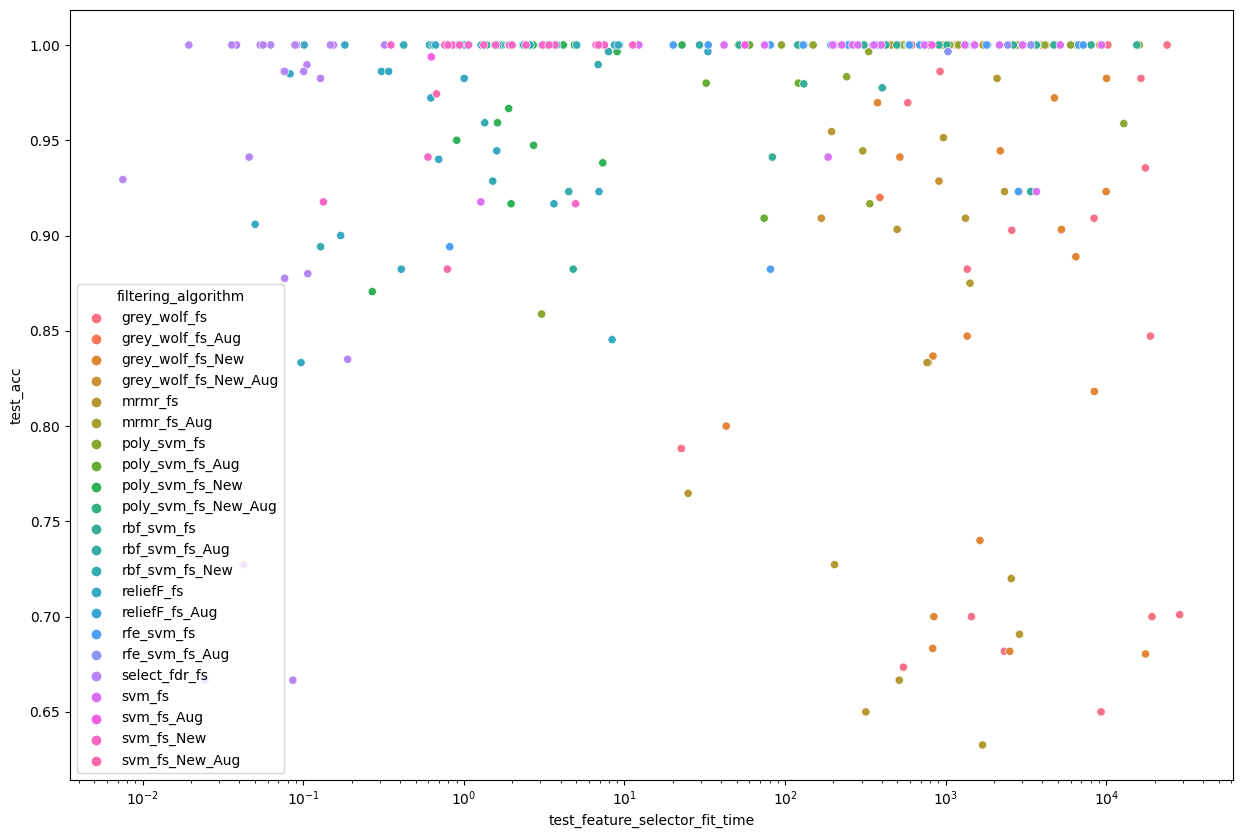

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
gb = df.groupby(['filtering_algorithm', 'dataset']).agg({'test_acc': 'max', 'test_feature_selector_fit_time': 'max'}).reset_index()
sns.scatterplot(x=gb['test_feature_selector_fit_time'], y=gb['test_acc'], hue=gb['filtering_algorithm'])
plt.xscale('log')

# Friedman PostHoc Test

rejected null hypothesis
algorithm poly_svm_fs is significantly better than algorithms {'select_fdr_fs', 'reliefF_fs', 'svm_fs_New', 'svm_fs', 'mrmr_fs', 'rbf_svm_fs_New', 'grey_wolf_fs', 'grey_wolf_fs_New', 'rfe_svm_fs', 'rbf_svm_fs'} in terms of test_roc_auc
algorithm poly_svm_fs_New is significantly better than algorithms {'select_fdr_fs', 'reliefF_fs', 'svm_fs_New', 'svm_fs', 'mrmr_fs', 'rbf_svm_fs_New', 'grey_wolf_fs', 'grey_wolf_fs_New', 'rfe_svm_fs', 'rbf_svm_fs'} in terms of test_roc_auc
algorithm rbf_svm_fs is significantly better than algorithms {'mrmr_fs', 'grey_wolf_fs', 'grey_wolf_fs_New'} in terms of test_roc_auc
algorithm rbf_svm_fs_New is significantly better than algorithms {'mrmr_fs', 'grey_wolf_fs', 'grey_wolf_fs_New'} in terms of test_roc_auc
algorithm reliefF_fs is significantly better than algorithms {'mrmr_fs', 'grey_wolf_fs', 'grey_wolf_fs_New', 'rfe_svm_fs'} in terms of test_roc_auc
algorithm rfe_svm_fs is significantly better than algorithms {'mrmr_fs', 'grey_

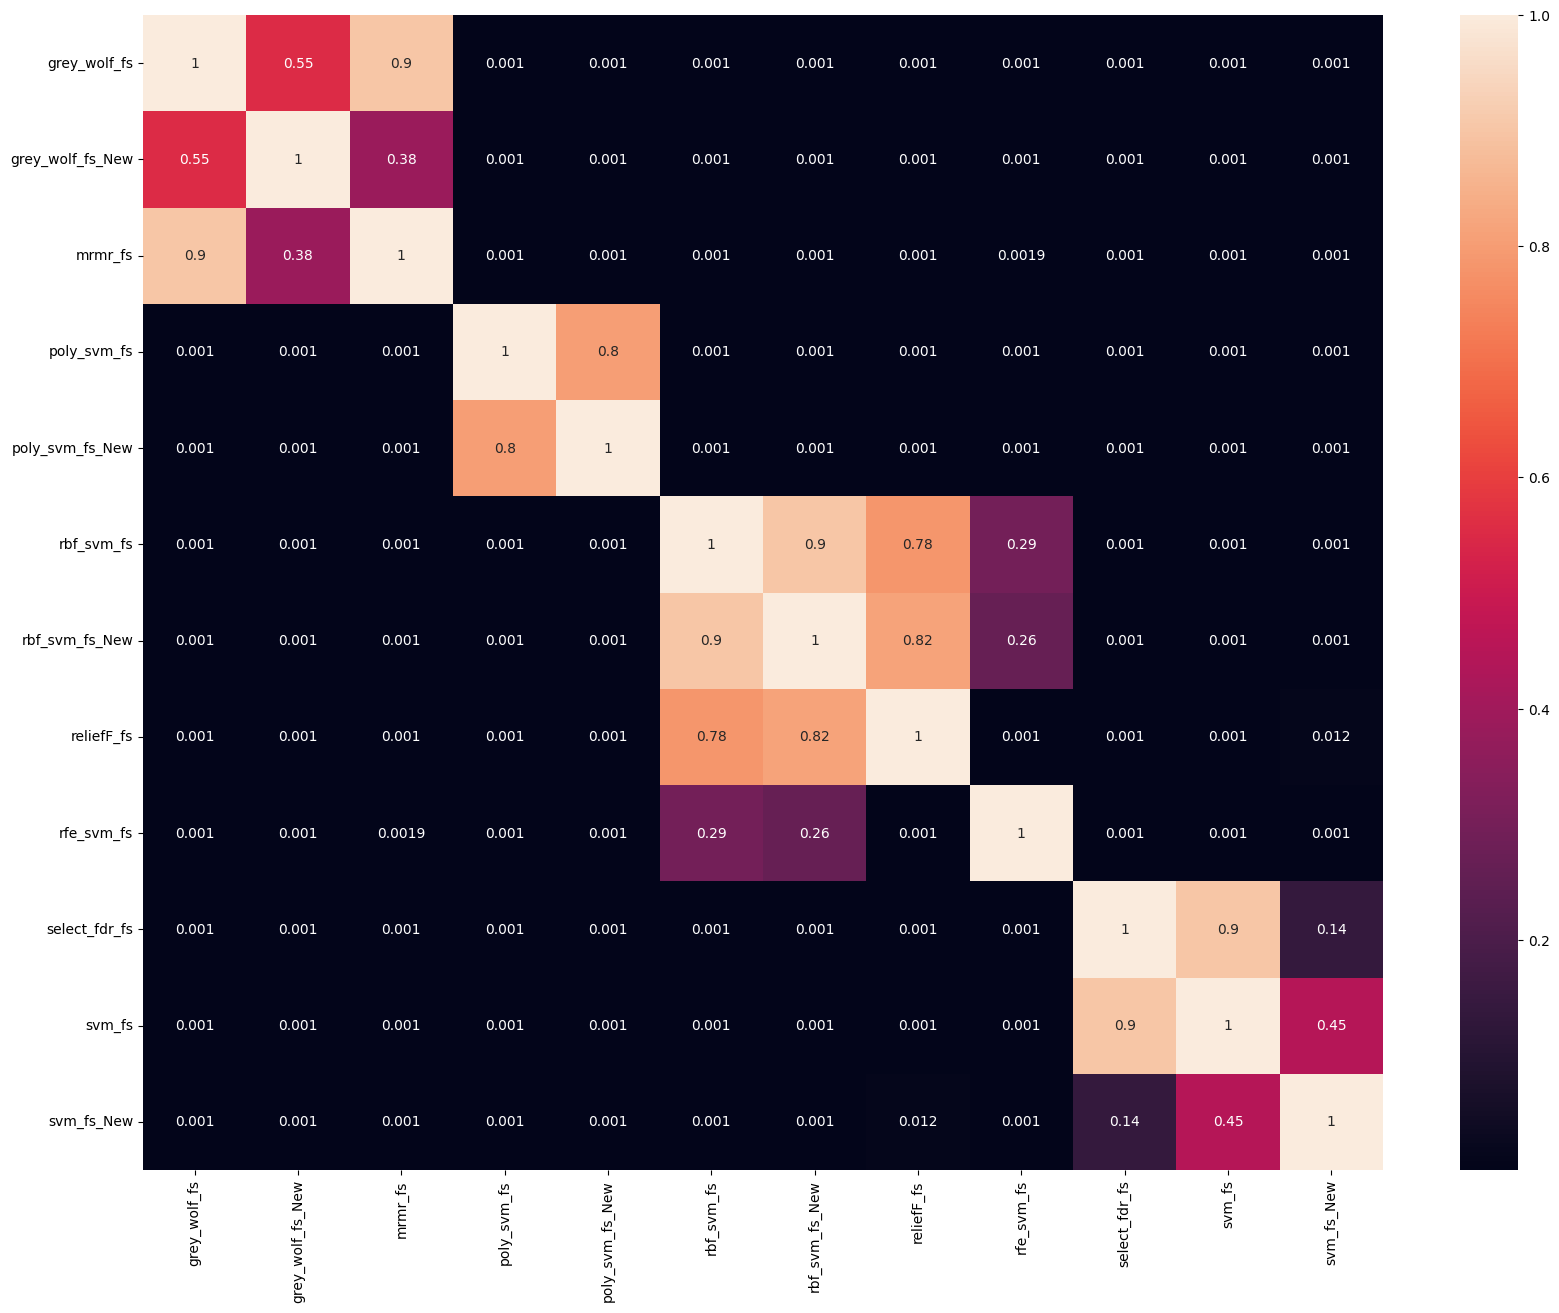

In [8]:
from friedman_posthoc_test import friedman_posthoc_test
friedman_posthoc_test(df[~df['filtering_algorithm'].str.endswith('_Aug')])